# Tic-Tac-Toe Agent

### by: Riddhi Tokdar
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [2]:
from TCGame_Env2 import TicTacToe #- import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [197]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [198]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [199]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [200]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
 
  decay_rate = -0.000001
  epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
  z = np.random.random()
  if z > epsilon:
    action = max(Q_dict[Q_state(state)],key=Q_dict[Q_state(state)].get)#Exploitation: this gets the action corresponding to max q-value of current state
  else:
    action = random.sample(valid_actions(state),1)[0]  

  return action 






#### Tracking the state-action pairs for checking convergence - write your code here

In [201]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)
print(len(Q_dict))
print(len(States_track))

0
0


In [202]:
# Initialise states to be tracked
def initialise_tracking_states():
  sample_q_values = [('x-3-x-x-x-6-x-x-x',(0,1)),
                       ('x-1-x-x-x-x-8-x-x',(2,9)),
                       ('x-x-x-x-6-x-x-x-5',(2,7)),
                       ('x-x-x-x-9-x-6-x-x',(1,7)),
                       ('x-5-x-2-x-x-4-7-x',(0,9)),
                       ('9-x-5-x-x-x-8-x-4',(1,3)),
                       ('2-7-x-x-6-x-x-3-x',(8,5)),
                       ('9-x-x-x-x-2-x-x-x',(2,5)),
                       ('x-x-7-x-x-x-x-x-2',(1,5)),
                       ('5-x-x-x-x-6-x-x-x',(4,9)),
                       ('4-x-x-6-x-x-3-1-x',(8,5)),
                       ('5-x-8-x-x-6-3-x-x',(3,1)),
                       ('x-6-5-x-2-x-x-3-x',(0,7)),
                       ('7-x-5-x-2-x-x-x-6',(1,3))]
    
  for q_values in sample_q_values:
      state = q_values[0]
      action = q_values[1]
      States_track[state][action] = []
  
  
  

In [203]:
States_track.keys()

dict_keys([])

In [204]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [205]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [206]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [208]:
EPISODES = 5000000


LR = 0.02   # learning rate
GAMMA = 0.91

max_epsilon = 1.0
min_epsilon = 0.001

threshold = 2000      
policy_threshold = 30000

### Q-update loop ---write your code here

In [209]:
import time
start_time = time.time()
agent_won_count=0
env_won_count=0
tie_count=0
for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe()
    curr_state = env.state
    is_terminal = False 
    add_to_dict(curr_state)
    total_reward = 0

    if(episode%10000==0):
      print("Current Episode: {}".format(episode))

    while not(is_terminal):
      
      curr_action = epsilon_greedy(curr_state, episode)
      next_state,reward,is_terminal, msg = env.step(curr_state,curr_action)

      curr_state1 = Q_state(curr_state)
      next_state1 = Q_state(next_state)
      add_to_dict(next_state)

      if is_terminal:
        if msg == "Agent Won!":
          agent_won_count += 1
        elif msg == "Environment Won!":
          env_won_count += 1
        else:
          tie_count += 1

        Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

      else:
        max_next = max(Q_dict[next_state1],key=Q_dict[next_state1].get)
        Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA * (Q_dict[next_state1][max_next]))) -Q_dict[curr_state1][curr_action])  
      #move to next state
      curr_state = next_state  

    # Tracking the Q-Values here
    
    if (episode == threshold-1):        #at the 1999th episode
        initialise_tracking_states()

    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')
    
    # Saving the Policy here
    
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')
    
    

    

    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

Current Episode: 0
Current Episode: 10000
Current Episode: 20000
Current Episode: 30000
Current Episode: 40000
Current Episode: 50000
Current Episode: 60000
Current Episode: 70000
Current Episode: 80000
Current Episode: 90000
Current Episode: 100000
Current Episode: 110000
Current Episode: 120000
Current Episode: 130000
Current Episode: 140000
Current Episode: 150000
Current Episode: 160000
Current Episode: 170000
Current Episode: 180000
Current Episode: 190000
Current Episode: 200000
Current Episode: 210000
Current Episode: 220000
Current Episode: 230000
Current Episode: 240000
Current Episode: 250000
Current Episode: 260000
Current Episode: 270000
Current Episode: 280000
Current Episode: 290000
Current Episode: 300000
Current Episode: 310000
Current Episode: 320000
Current Episode: 330000
Current Episode: 340000
Current Episode: 350000
Current Episode: 360000
Current Episode: 370000
Current Episode: 380000
Current Episode: 390000
Current Episode: 400000
Current Episode: 410000
Curren

#### Check the Q-dictionary

In [210]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.6367675681045792,
              (0, 3): -1.6470392880695772,
              (0, 5): -1.6865977068716083,
              (0, 7): -1.6639114027221957,
              (0, 9): -1.643829254582652,
              (1, 1): -1.6299134418034404,
              (1, 3): -1.6300230935166713,
              (1, 5): -1.6486118299445514,
              (1, 7): -1.6519549646310894,
              (1, 9): -1.6387345031854763,
              (2, 1): -1.6505320840771678,
              (2, 3): -1.6515052090168674,
              (2, 5): -1.668988603120806,
              (2, 7): -1.643709608337853,
              (2, 9): -1.643576093805847,
              (3, 1): -1.6390966545194448,
              (3, 3): -1.6413513361744252,
              (3, 5): -1.6509064849506616,
              (3, 7): -1.647043176791588,
              (3, 9): -1.6269838570841304,
              (4, 1): -1.6779891373376075,
              (4, 3): -1.6751313320552446,
              (4, 5)

In [150]:
len(Q_dict)

5754

In [218]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
test_state=Q_dict['4-x-1-x-2-5-x-x-x']
test_state

{(1, 3): -0.058808,
 (1, 7): -0.07042464,
 (1, 9): -0.058808,
 (3, 3): -0.03596,
 (3, 7): -0.058808,
 (3, 9): -0.058808,
 (6, 3): -0.02,
 (6, 7): -0.02,
 (6, 9): -0.058808,
 (7, 3): -0.039599999999999996,
 (7, 7): -0.02,
 (7, 9): -0.058808,
 (8, 3): -0.02,
 (8, 7): -0.02,
 (8, 9): 0.2}

In [219]:
sorted_test = sorted(test_state.items(), key=lambda x: x[1],reverse=True)
sorted_test 


[((8, 9), 0.2),
 ((6, 3), -0.02),
 ((6, 7), -0.02),
 ((7, 7), -0.02),
 ((8, 3), -0.02),
 ((8, 7), -0.02),
 ((3, 3), -0.03596),
 ((7, 3), -0.039599999999999996),
 ((1, 3), -0.058808),
 ((1, 9), -0.058808),
 ((3, 7), -0.058808),
 ((3, 9), -0.058808),
 ((6, 9), -0.058808),
 ((7, 9), -0.058808),
 ((1, 7), -0.07042464)]

The best action for state '4-x-1-x-2-5-x-x-x' is (8,9) i.e. putting value 9 in position 8

#### Check the states tracked for Q-values convergence
(non-evaluative)

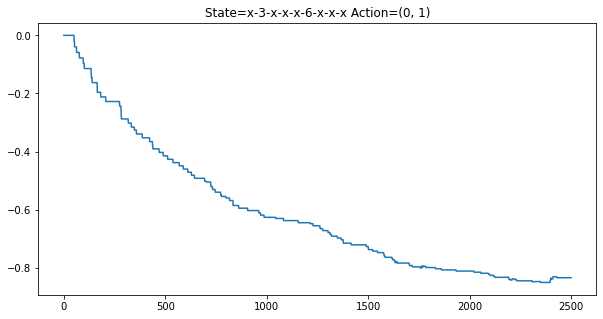

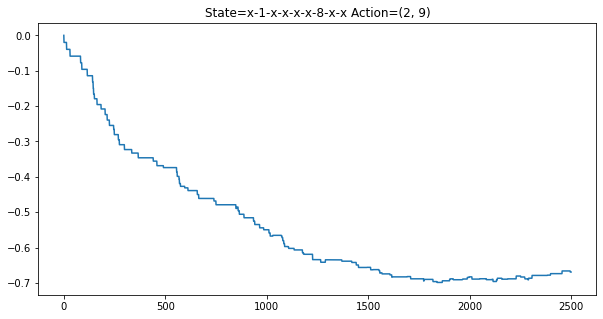

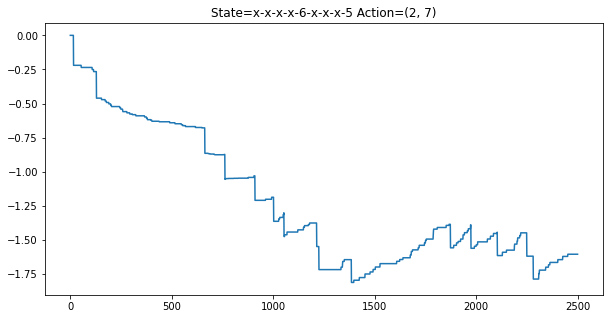

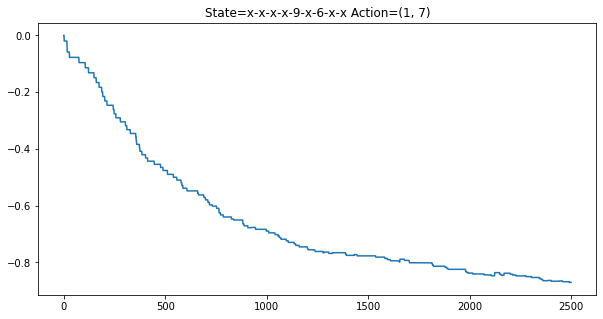

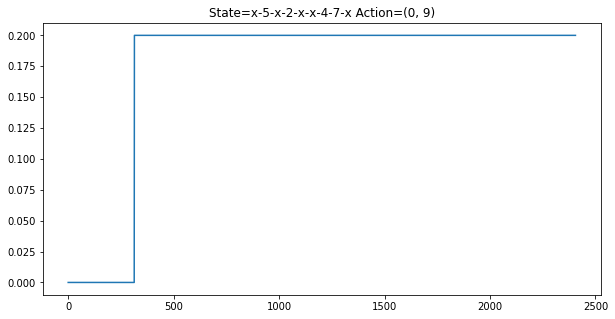

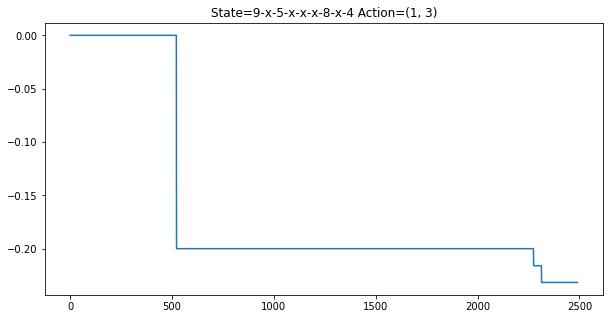

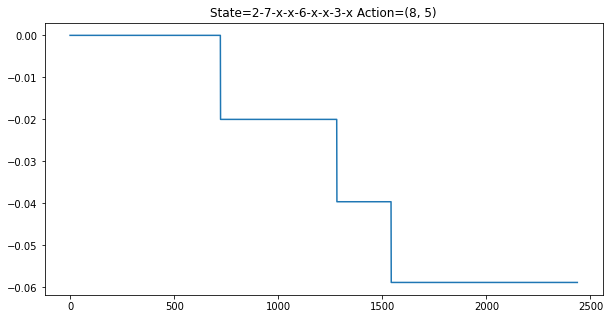

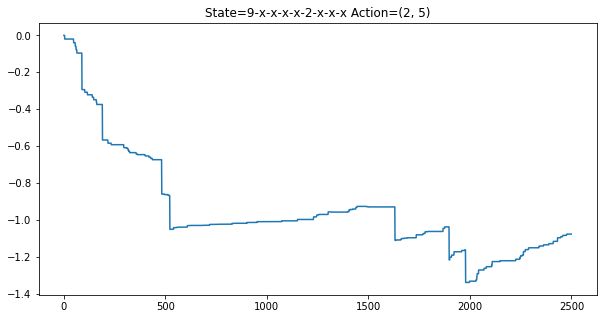

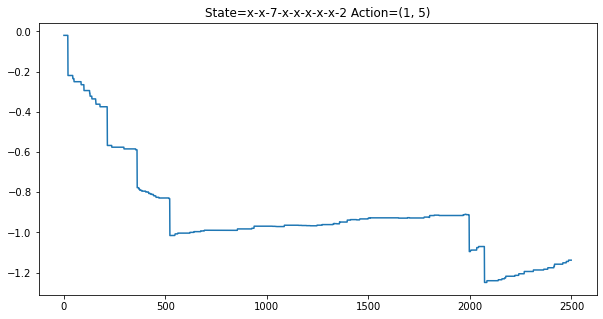

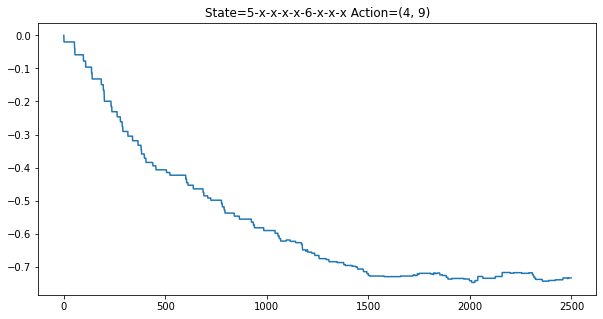

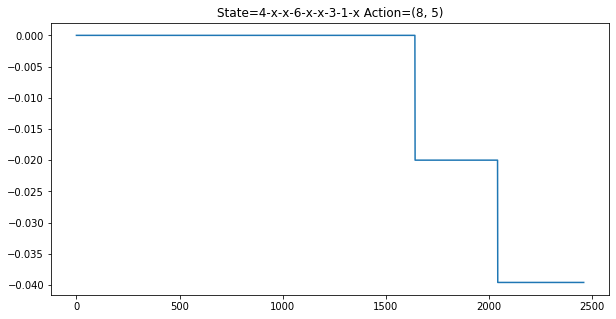

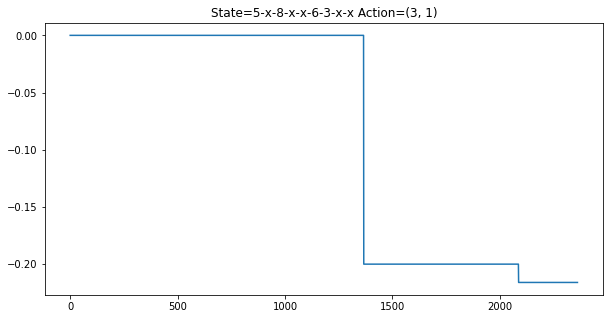

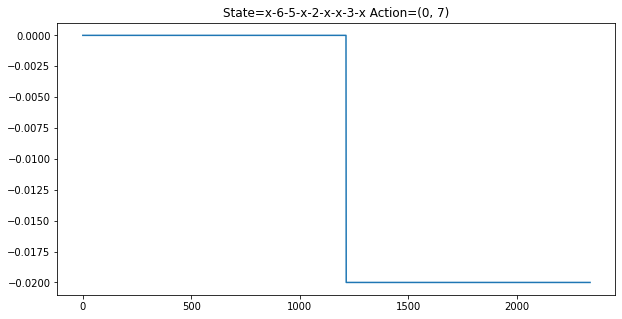

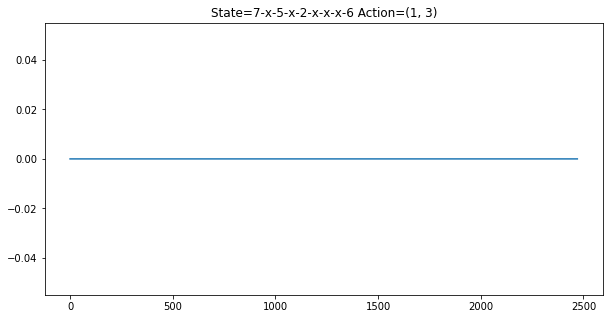

In [244]:
# Write the code for plotting the graphs for state-action pairs tracked
for s in States_track.keys():
  for k in States_track[s].keys():
    plt.figure(figsize=(10,5))
    print('\n')
    x_axis = np.asarray(range(0, len(States_track[s][k])))
    plt.title("State={a} Action={b}".format(a=s,b=k))
    plt.plot(x_axis,np.asarray(States_track[s][k]))
    plt.show()


### Epsilon - decay check

In [53]:
max_epsilon = 1.0
min_epsilon = 0.00001
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(round((min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.002*i)),2))

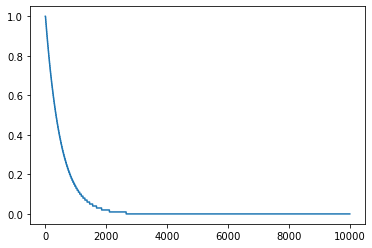

In [54]:
plt.plot(time, epsilon)
plt.show()

In [58]:
epsilon[2200]

0.01